# Non Hermitian 4 site Ising model 

\begin{align*}
H_{\lambda, \kappa} = -\frac{1}{2} \sum_{j}^{L} \left( \lambda \sigma_j^x \sigma_{j+1}^x + \sigma_j^z + i \kappa \sigma_j^x \right),
\end{align*}

In [59]:
from qiskit import QuantumCircuit
import scipy.linalg as la
import numpy as np
from qiskit.primitives import Estimator
from qiskit.quantum_info import Operator, SparsePauliOp
from scipy.optimize import minimize
from qiskit.circuit.library import TwoLocal

lam = 1.5
kap = 0.5

H = SparsePauliOp(['XXII','IXXI','IIXX','ZIII','IZII','IIZI','IIIZ','XIII','IXII','IIXI','IIIX'],
                          [-0.5*lam,-0.5*lam,-0.5*lam,-0.5,-0.5,-0.5,-0.5,-0.5j*kap,-0.5j*kap,-0.5j*kap,-0.5j*kap])
  
def VQA_1st_Step(theta, Er):
    
  ## theta contains Ei as first element
  Ei = theta[0]
  qc = ansatz.assign_parameters(theta[1:])
  H_minusE = H + SparsePauliOp([H.num_qubits*'I'],[-Er - 1j*Ei])
  operator = (H_minusE.conjugate() @ H_minusE).simplify()
  estimator = Estimator()
  result = estimator.run(qc, operator).result()
  return result.values[0]


def VQA_2nd_Step(theta):
    
  ## theta contains Er and Ei as 1st two elements
  Er = theta[0] ; Ei = theta[1] 
  qc = ansatz.assign_parameters(theta[2:])
  H_minusE = H + SparsePauliOp([H.num_qubits*'I'],[-Er - 1j*Ei])
  operator = (H_minusE.conjugate() @ H_minusE).simplify()
  estimator = Estimator()
  result = estimator.run(qc, operator).result()
  return result.values[0]


def get_energy(Er0, Ei0):
    
    x0 = np.random.random( len(ansatz.parameters) + 1 )

    x0[0] = Ei0

    result1 = minimize(lambda theta: VQA_1st_Step(theta,Er0), x0 = x0, method="BFGS") 

    x1 = np.concatenate(([Er0], result1.x))

    result2 = minimize(VQA_2nd_Step, x0 = x1, method="BFGS") 

    return [ result2.x[0], result2.x[1], result2.fun ]

ansatz = TwoLocal(H.num_qubits, ['ry', 'rz'], 'cz',reps=4)
get_energy(0.2,-1.5)

[np.float64(0.4277341179968297),
 np.float64(-0.17485443635668055),
 np.float64(4.677506992845082e-11)]

In [60]:
import random
Er0 = -3.0
E_max = 3.0
delE = 0.05

Eset0 = []

while (Er0 < E_max):

    Ei0 = random.randint(1,5)
    print(Ei0)
    
    result0 = get_energy(Er0, Ei0)
    
    Er = result0[0]
    Ei = result0[1]
    
    if result0[2] < 1.0e-05:
        Eset0.append(Er+1j*Ei)
        print(Er + 1j*Ei)
        print('LOSS: ',result0[2])

    result1 = get_energy(Er0, -1.0*Ei0)

    Er = result1[0]
    Ei = result1[1]

    if result1[2] < 1.0e-05:
        Eset0.append(Er+1j*Ei)
        print(Er + 1j*Ei)
        print('LOSS: ',result1[2])

    Er0 += delE


1
(-2.701479769631756+0.8628166136000084j)
LOSS:  1.667756890921801e-09
(-2.701480471251563-0.862816150459846j)
LOSS:  2.2477159022926685e-11
5
(-2.701480430841345+0.8628162217940851j)
LOSS:  1.2282369565852491e-11
(-2.7014806934011983-0.8628162943949093j)
LOSS:  7.7794895525507e-11
4
(-1.269662384411892+2.4752873978758725e-07j)
LOSS:  6.943451369423315e-11
(-1.269651523365165-2.0435651497037115e-06j)
LOSS:  1.180956721302806e-11
1
(-1.4581997113697398+4.198868743679829e-06j)
LOSS:  7.163436732682271e-09
(-1.4582012109584204+7.910366059411492e-06j)
LOSS:  5.987493370551711e-08
5
(-0.8374237313864771+3.6536405997104145e-05j)
LOSS:  4.0006957469085336e-10
(-0.8374410733958453-0.0003761207719741782j)
LOSS:  1.3197915017804096e-08
5
(-0.5636907857510026+7.475682072965103e-06j)
LOSS:  8.160745690322102e-11
(-0.5636805258927784+1.8351231498720043e-05j)
LOSS:  4.0941218748535846e-09
2
(0.42773008069113594+0.17485109346902755j)
LOSS:  9.827126612460546e-11
(0.4277350155119338+0.174855658697392

In [80]:
Eset = list(set([elem.round(3) for elem in Eset0]))
Erset = [elem.real for elem in Eset]
Eiset = [elem.imag for elem in Eset]

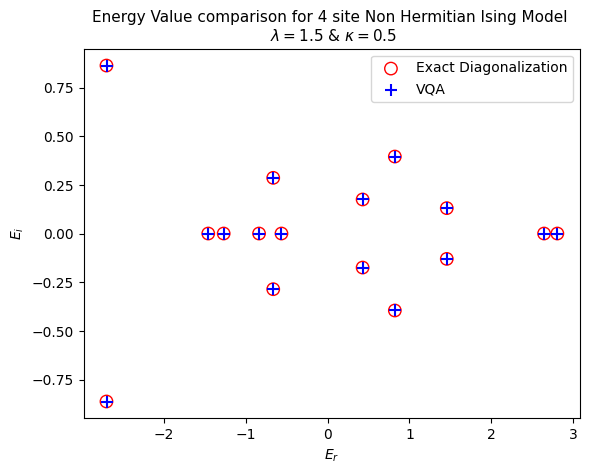

In [82]:
import matplotlib.pyplot as plt
main = la.eig(H)[0]
plt.xlabel('$E_r$')
plt.ylabel('$E_i$')
plt.scatter(main.real,main.imag,s= 80, facecolors = 'none', edgecolor = 'r',label = 'Exact Diagonalization')
plt.scatter(Erset,Eiset,s=70,marker = '+',label='VQA',color='b')
plt.legend()
plt.title("Energy Value comparison for 4 site Non Hermitian Ising Model \n "+ r"$\lambda = 1.5$ & $\kappa = 0.5 $", fontsize = 11)
plt.show()

In [75]:
main

array([-2.70148036+8.62816318e-01j, -2.70148036-8.62816318e-01j,
        2.80659048-2.01586247e-16j,  1.45585985+1.30345616e-01j,
        1.45585985-1.30345616e-01j,  0.42773262+1.74853872e-01j,
        0.42773262-1.74853872e-01j, -1.2696515 +8.40244842e-16j,
       -0.83747396-2.58925127e-16j, -0.56368925+1.56741380e-16j,
        2.64441997-1.52242694e-16j,  0.82130833+3.95406359e-01j,
        0.82130833-3.95406359e-01j, -1.45819852-4.32558932e-16j,
       -0.66441905-2.86013656e-01j, -0.66441905+2.86013656e-01j])